In [1]:
import chainer
import pickle
import matplotlib.pyplot as plt
from chainer import training
from chainer.training import extensions
from chainer.training.triggers import EarlyStoppingTrigger
from PIL import Image, ImageDraw
import numpy as np
import cv2

import net 
import make_random_mnist
import make_random_selfdata
from chainer import serializers
%matplotlib inline

In [2]:
def dispImage(img_vec):
    #title = 'Label number is ('+ str(label_x) + ',' + str(label_y) + ')' 
    fig = plt.figure()
    pixels = (img_vec * 256).reshape((28, 28))
    '''
    plt.imshow(pixels, cmap='gray')
    plt.axis("off")
    #plt.title(title)
    plt.show()
    '''
    return pixels
def separetePosition_and_angle_probabilityMap(data, data_len, border):
    angle_map_l = len(data[0]) - border 
    pos_map = np.zeros((data_len, border), dtype=np.float32)
    angle_map = np.zeros((data_len, angle_map_l), dtype=np.float32)
    for n in range(data_len):
        pos_map[n,:] = data[n][0:border]
        angle_map[n,:] = data[n][border:]
    return pos_map, angle_map
def save_images(x, filename, h= 29, w=113, cols=3,rows=3):
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(cols, rows, figsize=(9, 9), dpi=120, edgecolor='coral', linewidth=2)
    for ai, xi in zip(ax.ravel(), x):
        ai.imshow(xi.reshape(h, w))
    ai.set_title(filename)
    fig.savefig(filename)
    plt.show()
'''
def dispCropPos(img, cx, cy, deg, vec_ratio):
    t_img = img.copy() # cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
    rot_mat = cv2.getRotationMatrix2D((cx,cy), deg, 1.0)
    rot_mat[0][2] += -cx+28/2 # -(元画像内での中心位置)+(切り抜きたいサイズの中心)
    rot_mat[1][2] += -cy+28/2 # 同上
    conv_img_coord_x = (rot_mat[1][2]*vec_ratio)+14
    conv_img_coord_y = (rot_mat[0][2]*vec_ratio)+14
    print(conv_img_coord_x, conv_img_coord_y)
    t_img = cv2.circle(t_img, (conv_img_coord_x,conv_img_coord_y), 1, (255, 0, 0), thickness=-1, lineType=cv2.LINE_8, shift=0)
    t_img = cv2.rectangle(t_img, (conv_img_coord_x-14,conv_img_coord_y-14), 
                          (conv_img_coord_x+14,conv_img_coord_y+14), (255,0,0), thickness=0, lineType=cv2.LINE_8, shift=0)
    fig = plt.figure() # Figureオブジェクトを作成
    ax = fig.add_subplot(1,1,1) # figに属するAxesオブジェクトを作成
    plt.imshow(t_img)
    plt.show()
'''
def dispOneHotVec(img, vec, vec_size,vec_ratio):
    t_img = img.copy() # cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
    #print(np.where(vec==1))
    hotvec = vec.reshape(vec_size)
    #print(hotvec.shape)
    cx, cy = np.where(hotvec == 1)
    #print(cx, cy)
    conv_img_coord_x = (cy*vec_ratio)+14
    conv_img_coord_y = (cx*vec_ratio)+14
    t_img = cv2.circle(t_img, (conv_img_coord_x,conv_img_coord_y), 1, (255, 0, 0), thickness=-1, lineType=cv2.LINE_8, shift=0)
    t_img = cv2.rectangle(t_img, (conv_img_coord_x-14,conv_img_coord_y-14), 
                          (conv_img_coord_x+14,conv_img_coord_y+14), (255,0,0), thickness=0, lineType=cv2.LINE_8, shift=0)
    '''
    fig = plt.figure() # Figureオブジェクトを作成
    ax = fig.add_subplot(1,1,1) # figに属するAxesオブジェクトを作成
    plt.imshow(t_img)
    plt.show()
    '''
    return t_img
def plot_images2(data,filename,figsize=(10,6)):
    rows = len(data)
    cols = len(data[0])
    print(cols,rows)
    fig ,ax = plt.subplots(cols,rows,figsize=figsize)
    for r in range(rows):
        if len(data[r]) != cols:
            print(len(data[r]),'!=',rows)
            break
        for c in range(cols):
            ax[c,r].imshow(data[r][c])
    fig.savefig(filename)
    return fig,ax

In [3]:
NZDIM = 1
NLABELDIM = 784 #len(train[0][1])
CONTEXTDIM = 6477 #len(train[0][0])
HIDDEN = 150
model = net.MyCVAE(CONTEXTDIM, NZDIM, HIDDEN, NLABELDIM)
serializers.load_npz("mymodel_final.npz", model)

In [4]:
img = '../images/field_zyouge_sayuu_hanten.png'
dataset = make_random_selfdata.MakeRandomSelfdata(img)
test, test_debug_data = dataset.get_random_dataset_for_rcvae_with_2d_GentleOnehotPosMap_and_2d_GentleOnehotSinCos(1000,1)

variable([[0.]
          [0.]
          [0.]
          [0.]
          [0.]
          [0.]
          [0.]
          [0.]
          [0.]
          [0.]])
784
variable([[8.119544e-05]
          [8.119544e-05]
          [8.119544e-05]
          [8.119544e-05]
          [8.119544e-05]
          [8.119544e-05]
          [8.119544e-05]
          [8.119544e-05]
          [8.119544e-05]
          [8.119544e-05]]) variable([[6.8095296e-06]
          [6.8095296e-06]
          [6.8095296e-06]
          [6.8095296e-06]
          [6.8095296e-06]
          [6.8095296e-06]
          [6.8095296e-06]
          [6.8095296e-06]
          [6.8095296e-06]
          [6.8095296e-06]]) mu, var
(10, 3277)
10 5


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

(<Figure size 1440x2160 with 50 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe60d06ecf8>,
       dtype=object))

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

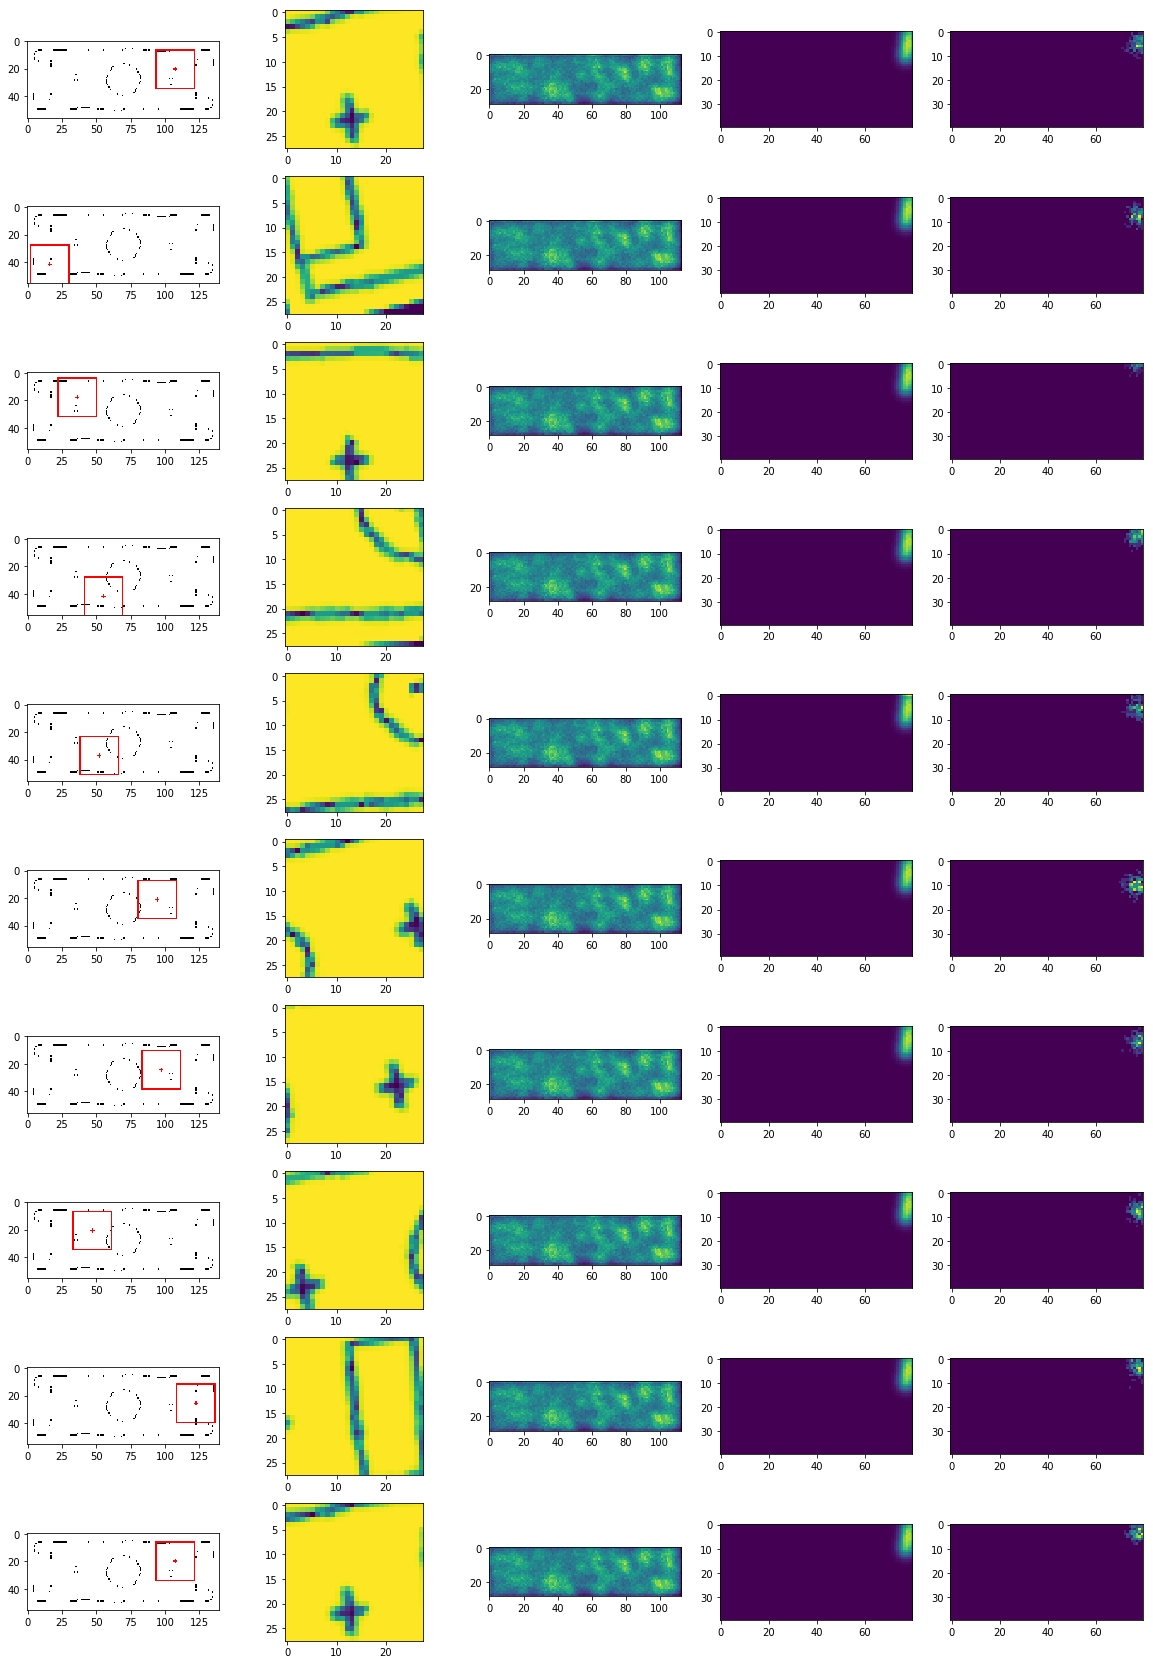

In [5]:
labels = np.zeros((10, dataset.onehot_w*dataset.onehot_h + 40*80), dtype=np.float32)       # one hot vector
images = np.zeros((10, 28*28), dtype=np.float32)       # condition
angles = np.zeros((10, 40*80), dtype=np.float32)
rect_map = np.zeros((10, 28*2, 28*5, 3), dtype=np.float32)
crop_img = np.zeros((10, 28, 28), dtype=np.float32)
z = chainer.Variable(np.zeros((10, 1), dtype=np.float32))
print(z)
train_l_map = np.zeros((10,len(test[0][0])),dtype=np.float32)
train_l_img = np.zeros((10,len(test[0][1])),dtype=np.float32)
print(len(test[0][1]))
for i in range(10):
    train_l_map[i,:] = test[i][0]
    train_l_img[i,:] = test[i][1]
with chainer.using_config('train', False), chainer.no_backprop_mode():
    z1_mu, z1_ln_var = model.encode(train_l_map, train_l_img)
    

#z1_mu = np.ones((10,1), dtype=np.float32)*(z1_mu[0])
#z1_mu = np.ones((10,1), dtype=np.float32)
print(z1_mu, z1_ln_var, 'mu, var')
for n in range(10):
    #print('訓練データの画像')
    posx = test_debug_data[n][0].astype(np.int64)
    posy = test_debug_data[n][1].astype(np.int64)
    deg = test_debug_data[n][2].astype(np.int64)
    #print(n, '番目')
    #print(deg, posx-14, posy-14 , 'deg, posx, posy')
    l = dataset.getLabel(posx, posy)
    r_im, rad = dataset.getRotateImageAndRad(posx, posy, deg)
    #dispCropPos(cv2.imread(img), posx, posy, deg, dataset.onehot_ratio)
    rect_map[n, :] = dispOneHotVec(cv2.imread(img), l, dataset.getOnehotSize(),dataset.onehot_ratio)
    crop_img[n, :] = dispImage(r_im)
    images[n, :] = np.reshape(r_im, 28*28)
    angles[n, :] = dataset.make_angle_map(deg)
    #dispImage(np.reshape(r_im,(28,28)))
values = images
with chainer.using_config('train', False), chainer.no_backprop_mode():
    x = model.decode(z1_mu, np.expand_dims(values, axis=1))
pos_map, angle_map = separetePosition_and_angle_probabilityMap(x.data, len(x.data), dataset.onehot_w* dataset.onehot_h)
#save_images(pos_map, 'sampled_pos_map',cols=5, rows=2)
#save_images(angle_map, 'samples_angle_map',h=40, w=80,cols=9,rows=1)
#save_images(angles, 'otehon_angle_map',h=40, w=80,cols=9,rows=1)

print(pos_map.shape)
plot_images2((rect_map, crop_img,np.reshape(pos_map,(10,dataset.onehot_h,dataset.onehot_w)), np.reshape(angle_map,(10,40,80)), np.reshape(angles,(10,40,80))), "z_of_genarated_encording_from_first_image.png", figsize=(20,30))

In [6]:
import chainer.functions as F
#print(z1_mu, z1_ln_var)
sigma = np.sqrt(np.exp(-5.895322))
print(sigma)
#print(z1_mu, sigma)
a = np.arange(0,10,0.01)

'''
mu = np.array([0], dtype=np.float32)
sigma = np.array([], dtype=np.float32)
z = F.gaussian(mu, sigma)
print(z)
'''

0.05246227180553665


'\nmu = np.array([0], dtype=np.float32)\nsigma = np.array([], dtype=np.float32)\nz = F.gaussian(mu, sigma)\nprint(z)\n'